<a href="https://colab.research.google.com/github/michael0806/Front-end-Developer-Technical-Test/blob/master/Copy_of_baseline_model__withcrime_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import os
import warnings  
warnings.filterwarnings('ignore')

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv("/content/drive/MyDrive/Lab 02/data_withcrime_31.csv")

In [57]:
df.head()

,averge_room,Male,Female,Average Age,European,Māori,Pacific Peoples,Asian,Middle Eastern / Latin American / African,Other Ethnicity,...,median_FA,median_AR,median_bed,median_Bath,median_Price,median_school,weighted_weapon,weighted_crime,Number_of_happens,Number of Victimisations
0,2.684211,0.580000,0.420000,41.423077,0.703125,0.265625,0.000000,0.000000,0.0,0.015625,...,-1.116825,1.306734,-2.155759,-0.752181,12.577041,0.0,0.0,0.470588,8,8
1,2.161290,0.547170,0.452830,50.076923,0.746032,0.142857,0.047619,0.015873,0.0,0.015873,...,-1.324414,0.317926,-2.155759,-0.752181,12.396693,0.0,0.0,0.647059,11,11
2,2.266667,0.568182,0.431818,48.190476,0.788462,0.173077,0.019231,0.019231,0.0,0.000000,...,-1.324414,0.250772,-2.155759,-0.752181,12.013701,0.0,0.0,0.647059,11,12
3,2.882353,0.640000,0.360000,51.130435,0.884615,0.038462,0.000000,0.000000,0.0,0.038462,...,-1.179101,0.267217,-2.155759,-0.752181,12.706848,0.0,0.0,0.647059,11,11
4,2.310345,0.500000,0.500000,46.402985,0.717647,0.211765,0.011765,0.011765,0.0,0.023529,...,-1.158342,0.441270,-2.155759,-0.752181,12.396693,0.0,0.0,0.294118,5,5


In [58]:
#Check whether there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   averge_room                                7417 non-null   float64
 1   Male                                       7417 non-null   float64
 2   Female                                     7417 non-null   float64
 3   Average Age                                7417 non-null   float64
 4   European                                   7417 non-null   float64
 5   Māori                                      7417 non-null   float64
 6   Pacific Peoples                            7417 non-null   float64
 7   Asian                                      7417 non-null   float64
 8   Middle Eastern / Latin American / African  7417 non-null   float64
 9   Other Ethnicity                            7417 non-null   float64
 10  New Zealander(19)       

In [59]:
#Check how many unique values are present in each column
for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For averge_room,810 unique values present
For Male,628 unique values present
For Female,628 unique values present
For Average Age,4295 unique values present
For European,2286 unique values present
For Māori,1116 unique values present
For Pacific Peoples,1588 unique values present
For Asian,1872 unique values present
For Middle Eastern / Latin American / African,441 unique values present
For Other Ethnicity,254 unique values present
For New Zealander(19),205 unique values present
For Other Ethnicity nec(19),203 unique values present
For Median personal income($),580 unique values present
For Employed Full time,580 unique values present
For Employed Part time,590 unique values present
For Unemployed,434 unique values present
For Paid employee,716 unique values present
For Employer,406 unique values present
For Self employed and without employees,532 unique values present
For Unpaid family worker,194 unique values present
For median_CV,703 unique values present
For median_FA,426 unique va

In [60]:
cor = df.corr()
cor

,averge_room,Male,Female,Average Age,European,Māori,Pacific Peoples,Asian,Middle Eastern / Latin American / African,Other Ethnicity,...,median_FA,median_AR,median_bed,median_Bath,median_Price,median_school,weighted_weapon,weighted_crime,Number_of_happens,Number of Victimisations
averge_room,1.000000,0.000650,-0.000650,-0.048285,0.065096,-0.102591,-0.077335,0.049210,-0.161654,0.025268,...,0.564256,0.235848,0.585953,0.450608,0.253853,0.091012,-0.126667,-0.140016,-0.140016,-0.136570
Male,0.000650,1.000000,-1.000000,-0.220998,-0.138172,0.061808,0.045684,0.108145,0.034332,0.002869,...,-0.100149,0.058549,-0.064458,-0.077680,-0.125794,-0.049451,0.079628,0.082622,0.082622,0.078562
Female,-0.000650,-1.000000,1.000000,0.220998,0.138172,-0.061808,-0.045684,-0.108145,-0.034332,-0.002869,...,0.100149,-0.058549,0.064458,0.077680,0.125794,0.049451,-0.079628,-0.082622,-0.082622,-0.078562
Average Age,-0.048285,-0.220998,0.220998,1.000000,0.574768,-0.380705,-0.496849,-0.127193,-0.064598,0.045347,...,0.361605,0.105118,0.157871,0.277260,0.395977,0.156010,-0.060312,0.002017,0.002017,0.003303
European,0.065096,-0.138172,0.138172,0.574768,1.000000,-0.338787,-0.689233,-0.520850,-0.117761,0.066593,...,0.310387,0.229376,0.133808,0.252913,0.452925,0.166634,-0.129460,-0.063920,-0.063920,-0.059822
Māori,-0.102591,0.061808,-0.061808,-0.380705,-0.338787,1.000000,0.482029,-0.388221,-0.192239,-0.142475,...,-0.408070,0.062222,-0.229995,-0.370847,-0.467776,-0.407500,0.090405,0.010931,0.010931,0.009858
Pacific Peoples,-0.077335,0.045684,-0.045684,-0.496849,-0.689233,0.482029,1.000000,-0.190753,-0.124851,-0.183425,...,-0.426282,-0.058351,-0.208018,-0.362078,-0.502981,-0.333223,0.066954,-0.020616,-0.020616,-0.021482
Asian,0.049210,0.108145,-0.108145,-0.127193,-0.520850,-0.388221,-0.190753,1.000000,0.214034,0.007160,...,0.159354,-0.249842,0.122668,0.154012,0.063746,0.248854,0.069014,0.096554,0.096554,0.092670
Middle Eastern / Latin American / African,-0.161654,0.034332,-0.034332,-0.064598,-0.117761,-0.192239,-0.124851,0.214034,1.000000,0.051989,...,-0.031549,-0.183352,-0.082375,0.007469,0.025926,0.079639,0.018265,0.035627,0.035627,0.033609
Other Ethnicity,0.025268,0.002869,-0.002869,0.045347,0.066593,-0.142475,-0.183425,0.007160,0.051989,1.000000,...,0.067691,0.003238,0.038282,0.067566,0.047352,0.050876,-0.021717,-0.020448,-0.020448,-0.020193


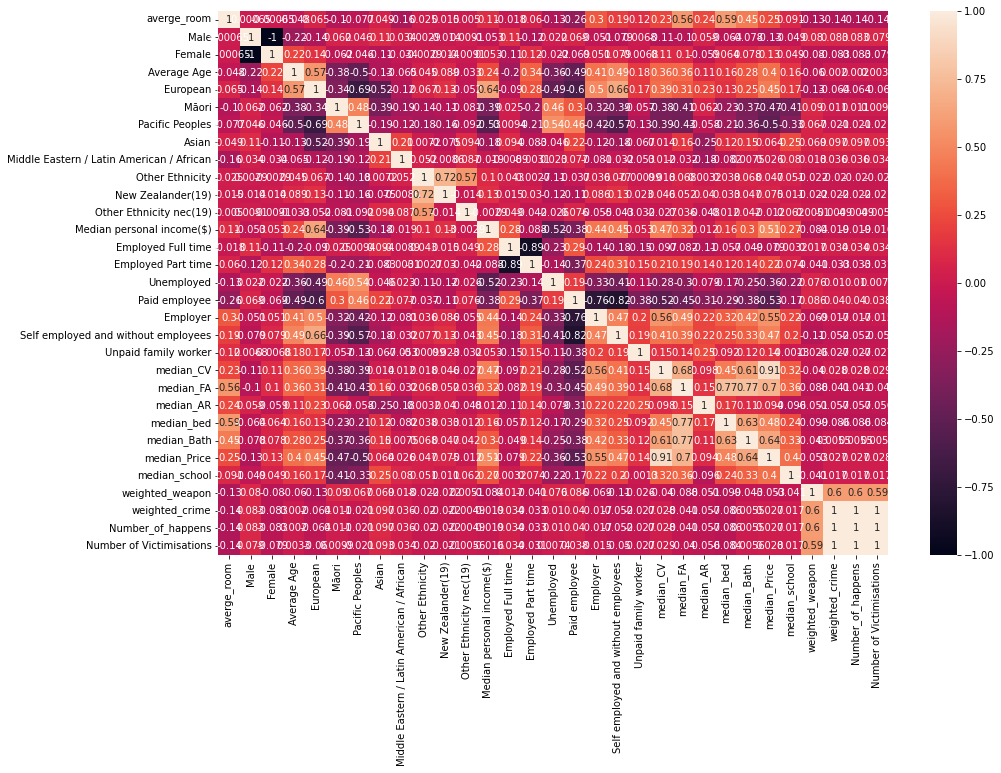

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)

In [62]:
df2= df.drop(['median_CV'], axis=1)

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   averge_room                                7417 non-null   float64
 1   Male                                       7417 non-null   float64
 2   Female                                     7417 non-null   float64
 3   Average Age                                7417 non-null   float64
 4   European                                   7417 non-null   float64
 5   Māori                                      7417 non-null   float64
 6   Pacific Peoples                            7417 non-null   float64
 7   Asian                                      7417 non-null   float64
 8   Middle Eastern / Latin American / African  7417 non-null   float64
 9   Other Ethnicity                            7417 non-null   float64
 10  New Zealander(19)       

In [64]:
df2.shape

(7417, 30)

In [65]:
 #Building our model using different regression models
 # X(Independent variables) and y(target variables) 
X = df2.drop(['median_Price'], axis=1)
Y = df2['median_Price']

In [66]:
print(X.shape, Y.shape)

(7417, 29) (7417,)


In [67]:
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [68]:
print(X_train.shape, X_valid.shape)

(5933, 29) (1484, 29)


In [69]:
pd.value_counts(Y_train)

12.660328    19
12.921470    18
12.594731    18
12.804909    18
12.834681    18
             ..
12.717397     1
13.147044     1
12.737239     1
13.509366     1
12.665017     1
Name: median_Price, Length: 3231, dtype: int64

In [70]:
#Random Forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,Y_train)
rf_regressor.score(X_valid,Y_valid)
rf_pred =rf_regressor.predict(X_valid)
rf_score=rf_regressor.score(X_valid,Y_valid)
expl_rf = explained_variance_score(rf_pred,Y_valid)

In [71]:
rf_RMSE = np.sqrt(mean_squared_error(Y_valid, rf_pred))

In [72]:
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_valid,Y_valid)*100))

Random Forest Regression Model Score is  72


In [73]:
#Decision Tree Regression Model
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,Y_train)
tr_regressor.score(X_valid,Y_valid)
pred_tr = tr_regressor.predict(X_valid)
decision_score=tr_regressor.score(X_valid,Y_valid)
expl_tr = explained_variance_score(pred_tr,Y_valid)

In [74]:
tr_RMSE = np.sqrt(mean_squared_error(Y_valid, pred_tr))

In [75]:
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_valid,Y_valid)*100))

Decision tree  Regression Model Score is  44


In [76]:
#Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,Y_train)
mlr_score = mlr.score(X_valid,Y_valid)
pred_mlr = mlr.predict(X_valid)
expl_mlr = explained_variance_score(pred_mlr,Y_valid)

In [77]:
mlr_RMSE = np.sqrt(mean_squared_error(Y_valid, pred_mlr))

In [78]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_valid,Y_valid)*100))

Multiple Linear Regression Model Score is  67


In [79]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Accuracy_train_Score':[mlr_score,decision_score,rf_score],
                            'Accuracy_test_Score':[expl_mlr,expl_tr,expl_rf],
                            'RMSE: ':[mlr_RMSE,tr_RMSE,rf_RMSE]
                           })
models_score.sort_values(by='Accuracy_train_Score',ascending=False)

,Model,Accuracy_train_Score,Accuracy_test_Score,RMSE:
2,Random forest Regression,0.718049,0.569219,0.247088
0,Multiple Linear Regression,0.670171,0.503119,0.267244
1,Decision Tree,0.437522,0.427868,0.348993
